In [1]:
#importing necessary libraries for EDA on data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#defining the columns name
cols = ['MPG', 'Cylinders','Displacement','Horsepower','Weight','Acceleration','Model year','Origin']

df = pd.read_csv('auto-mpg.data', names = cols,sep = " ", skipinitialspace= True,comment = '\t',na_values= '?')
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
#making copy of the data
data = df.copy()
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


# Problem Statement :  The data contains the MPG (Mile Per Gallon) variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle in the 70s and 80s.

# Our aim here is to predict the MPG value for a vehicle, given that we have other attributes of that vehicle.

In [4]:
#EDA with pandas and numpy
#1. check for data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
#2. checking for null values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model year      0
Origin          0
dtype: int64

we have 6 nan values in Horsepower

In [6]:
#summary statistics
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Horsepower'>

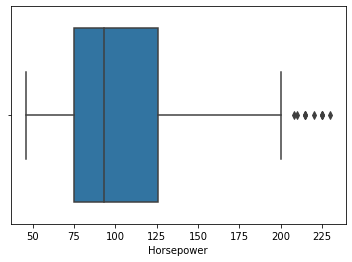

In [7]:
#looking for outliers in Horsepower column
sns.boxplot(data.Horsepower)

In [8]:
#we will use median of the Horsepower column to fill the nan values
median = data.Horsepower.median()
data['Horsepower']= data.Horsepower.fillna(median)

In [9]:
'''The 2 categorical columns are Cylinders and Origin, which only have a few categories of values. 
Looking at the distribution of the values among these categories will tell us how the data is distributed'''

'The 2 categorical columns are Cylinders and Origin, which only have a few categories of values. \nLooking at the distribution of the values among these categories will tell us how the data is distributed'

In [10]:
data.Cylinders.value_counts()*100/len(data)


4    51.256281
8    25.879397
6    21.105528
3     1.005025
5     0.753769
Name: Cylinders, dtype: float64

In [11]:
data.Origin.value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [12]:
#plot for correlation
data.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
MPG,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
Cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
Displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
Horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
Weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
Acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
Model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
Origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


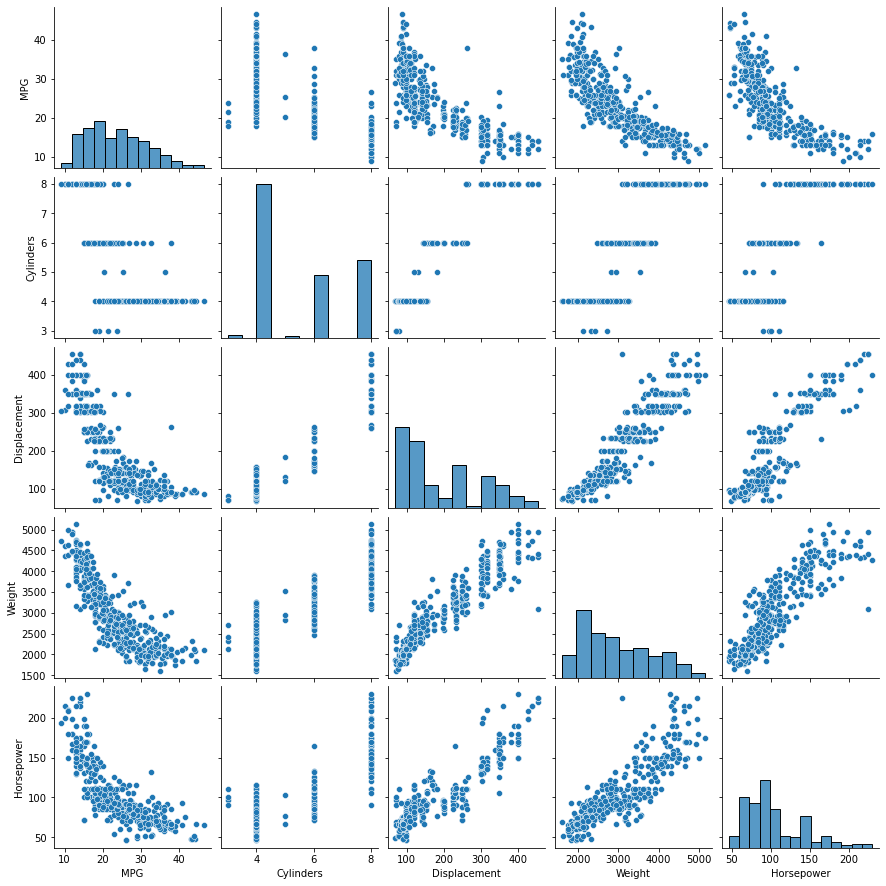

In [13]:
sns.pairplot(data[['MPG','Cylinders','Displacement','Weight','Horsepower']])

The pair plot gives you a brief overview of how each variable behaves with respect to every other variable.

For example, the MPG column (our target variable) is negatively correlated with the displacement, weight, and horsepower features

# Stratified Sampling — We create homogeneous subgroups called strata from the overall population and sample the right number of instances to each stratum to ensure that the test set is representative of the overall population.

 we saw how the data is distributed over each category of the Cylinder column. We’re using the Cylinder column to create the strata:

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state = 42)
for train_index , test_index in split.split(data, data.Cylinders) :
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [36]:
#checking for cylinder category distribution in training set
train_set.Cylinders.value_counts()/len(train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [16]:
#checking for cylinder category distribution in test set
test_set.Cylinders.value_counts()/len(test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

# Checking the Origin Column
The Origin column about the origin of the vehicle has discrete values that look like the code of a country.

In [17]:
#Converting integers of origin column into the name of the country
train_set['Origin'] = train_set['Origin'].map({1 : 'India', 2 : 'USA', 3 : 'Germany'})

In [18]:
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,Germany
151,31.0,4,79.0,67.0,2000.0,16.0,74,USA
388,26.0,4,156.0,92.0,2585.0,14.5,82,India
48,18.0,6,250.0,88.0,3139.0,14.5,71,India
114,26.0,4,98.0,90.0,2265.0,15.5,73,USA


# One Hot Encoding

In [42]:
#We’ll have to preprocess this categorical column by one-hot encoding these values:
train_set = pd.get_dummies(train_set, prefix_sep='',prefix = '')
train_set.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


# testing new variables by checking their correlation w.r.t. MPG

In [20]:
data['displacemnet_on_power'] = data['Displacement']/data['Horsepower']
data['weight_on_cylinder'] = data['Weight']/data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

In [21]:
data.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,displacemnet_on_power,weight_on_cylinder,acceleration_on_power,acceleration_on_cyl
MPG,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450,-0.577236,-0.020778,0.704240,0.732133
Cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543,0.732550,-0.371772,-0.695407,-0.913462
Displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409,0.751036,-0.192330,-0.730931,-0.884569
Horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096,0.398118,-0.077308,-0.850591,-0.846458
Weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024,0.685536,0.057917,-0.706756,-0.801469
Acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873,-0.084175,0.218881,0.843825,0.770886
Model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662,-0.161021,0.162992,0.320542,0.342416
Origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000,-0.634475,0.035753,0.406884,0.508619
displacemnet_on_power,-0.577236,0.732550,0.751036,0.398118,0.685536,-0.084175,-0.161021,-0.634475,1.000000,-0.228081,-0.278609,-0.594729
weight_on_cylinder,-0.020778,-0.371772,-0.192330,-0.077308,0.057917,0.218881,0.162992,0.035753,-0.228081,1.000000,0.034684,0.370010


In [22]:
data.corr()['MPG'].sort_values(ascending= False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacemnet_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

We found acceleration_on_power and acceleration_on_cyl as two new variables which turned out to be more positively correlated than the original variables.

In [47]:
data_feature = train_set.drop('MPG', axis = 1)
data_label = train_set[['MPG']]

In [45]:
data_feature

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Germany,India,USA
145,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,4,98.0,90.0,2265.0,15.5,73,0,0,1
...,...,...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,0,0,1
156,8,400.0,170.0,4668.0,11.5,75,0,1,0
395,4,135.0,84.0,2295.0,11.6,82,0,1,0
14,4,113.0,95.0,2372.0,15.0,70,1,0,0


In [48]:
data_label


,MPG
145,32.0
151,31.0
388,26.0
48,18.0
114,26.0
...,...
147,24.0
156,16.0
395,32.0
14,24.0


In [49]:
train_set.to_csv('data_preparation_part1', index = None)